In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- Load data ---
PATH_QUERY_TRAIN_DATA = '/content/subtask4b_query_tweets_train.tsv'
PATH_QUERY_DEV_DATA   = '/content/subtask4b_query_tweets_dev.tsv'
PATH_COLLECTION_DATA  = '/content/subtask4b_collection_data.pkl'  # ✅ MODIFY PATH AS NEEDED

df_query_train = pd.read_csv(PATH_QUERY_TRAIN_DATA, sep='\t')
df_query_dev   = pd.read_csv(PATH_QUERY_DEV_DATA, sep='\t')
df_collection  = pd.read_pickle(PATH_COLLECTION_DATA)  # this is a dict



In [3]:
df_query_train.head()

,post_id,tweet_text,cord_uid
0,0,Oral care in rehabilitation medicine: oral vul...,htlvpvz5
1,1,this study isn't receiving sufficient attentio...,4kfl29ul
2,2,"thanks, xi jinping. a reminder that this study...",jtwb17u8
3,3,Taiwan - a population of 23 million has had ju...,0w9k8iy1
4,4,Obtaining a diagnosis of autism in lower incom...,tiqksd69


In [4]:
df_query_dev.head()

,post_id,tweet_text,cord_uid
0,16,covid recovery: this study from the usa reveal...,3qvh482o
1,69,"""Among 139 clients exposed to two symptomatic ...",r58aohnu
2,73,I recall early on reading that researchers who...,sts48u9i
3,93,You know you're credible when NIH website has ...,3sr2exq9
4,96,Resistance to antifungal medications is a grow...,ybwwmyqy


In [5]:
df_collection.head()

,cord_uid,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,label,time,timet
162,umvrwgaw,PMC,Professional and Home-Made Face Masks Reduce E...,10.1371/journal.pone.0002618,PMC2440799,18612429,cc-by,BACKGROUND: Governments are preparing for a po...,2008-07-09,"van der Sande, Marianne; Teunis, Peter; Sabel,...",PLoS One,NaN,NaN,NaN,umvrwgaw,2008-07-09,1215561600
611,spiud6ok,PMC,The Failure of R (0),10.1155/2011/527610,PMC3157160,21860658,cc-by,"The basic reproductive ratio, R (0), is one of...",2011-08-16,"Li, Jing; Blakeley, Daniel; Smith?, Robert J.",Comput Math Methods Med,NaN,NaN,NaN,spiud6ok,2011-08-16,1313452800
918,aclzp3iy,PMC,Pulmonary sequelae in a patient recovered from...,10.4103/0970-2113.99118,PMC3424870,22919170,cc-by-nc-sa,The pandemic of swine flu (H1N1) influenza spr...,2012,"Singh, Virendra; Sharma, Bharat Bhushan; Patel...",Lung India,NaN,NaN,NaN,aclzp3iy,2012-01-01,1325376000
993,ycxyn2a2,PMC,What was the primary mode of smallpox transmis...,10.3389/fcimb.2012.00150,PMC3509329,23226686,cc-by,The mode of infection transmission has profoun...,2012-11-29,"Milton, Donald K.",Front Cell Infect Microbiol,NaN,NaN,NaN,ycxyn2a2,2012-11-29,1354147200
1053,zxe95qy9,PMC,"Lessons from the History of Quarantine, from P...",10.3201/eid1902.120312,PMC3559034,23343512,no-cc,"In the new millennium, the centuries-old strat...",2013-02-03,"Tognotti, Eugenia",Emerg Infect Dis,NaN,NaN,NaN,zxe95qy9,2013-02-03,1359849600


## EDA

### DF query Train

In [6]:
print(df_query_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12853 entries, 0 to 12852
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   post_id     12853 non-null  int64 
 1   tweet_text  12853 non-null  object
 2   cord_uid    12853 non-null  object
dtypes: int64(1), object(2)
memory usage: 301.4+ KB
None


In [7]:
print(df_query_train.isnull().sum())

post_id       0
tweet_text    0
cord_uid      0
dtype: int64


In [8]:
print("Total rows:", len(df_query_train))

Total rows: 12853


In [9]:
# Tweet length analysis
df_query_train['tweet_length_chars'] = df_query_train['tweet_text'].apply(len)
df_query_train['tweet_length_words'] = df_query_train['tweet_text'].apply(lambda x: len(x.split()))


In [10]:
# Basic stats
print("\n📏 Tweet length (characters):")
print(df_query_train['tweet_length_chars'].describe())

print("\n📏 Tweet length (words):")
print(df_query_train['tweet_length_words'].describe())


📏 Tweet length (characters):
count    12853.000000
mean       197.533105
std         58.220218
min         22.000000
25%        152.000000
50%        211.000000
75%        248.000000
max        535.000000
Name: tweet_length_chars, dtype: float64

📏 Tweet length (words):
count    12853.000000
mean        29.362017
std          9.478531
min          2.000000
25%         22.000000
50%         31.000000
75%         37.000000
max         70.000000
Name: tweet_length_words, dtype: float64


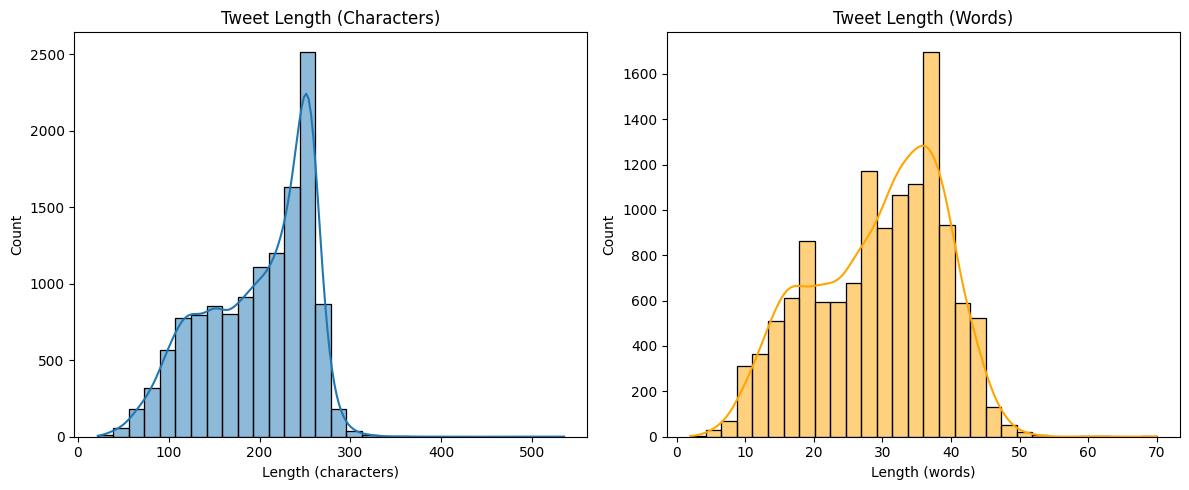

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_query_train['tweet_length_chars'], bins=30, kde=True)
plt.title("Tweet Length (Characters)")
plt.xlabel("Length (characters)")

plt.subplot(1, 2, 2)
sns.histplot(df_query_train['tweet_length_words'], bins=30, kde=True, color='orange')
plt.title("Tweet Length (Words)")
plt.xlabel("Length (words)")

plt.tight_layout()
plt.show()

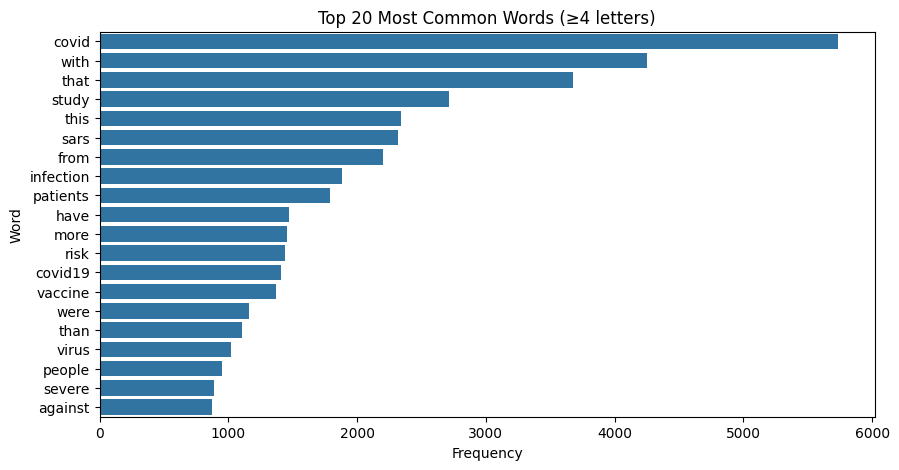

In [14]:
# Most common words (basic quick-and-dirty)
from collections import Counter
import re

all_words = " ".join(df_query_train['tweet_text']).lower()
all_words = re.findall(r'\b\w{4,}\b', all_words)  # filter: only words with 4+ characters
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Bar plot of most common words
words, freqs = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(freqs), y=list(words))
plt.title("Top 20 Most Common Words (≥4 letters)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

### DF Collection

In [20]:
print("🧾 DataFrame structure:")
print(df_collection.info())
print("\n📌 First few rows:")
print(df_collection.head())
print("\n🔍 Column names:")
print(df_collection.columns.tolist())

🧾 DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
Index: 7718 entries, 162 to 1056448
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cord_uid          7718 non-null   object        
 1   source_x          7718 non-null   object        
 2   title             7718 non-null   object        
 3   doi               7677 non-null   object        
 4   pmcid             4959 non-null   object        
 5   pubmed_id         6233 non-null   object        
 6   license           7718 non-null   object        
 7   abstract          7718 non-null   object        
 8   publish_time      7715 non-null   object        
 9   authors           7674 non-null   object        
 10  journal           6668 non-null   object        
 11  mag_id            0 non-null      float64       
 12  who_covidence_id  528 non-null    object        
 13  arxiv_id          20 non-null     object        
 14  l

In [21]:
print("\n❓ Missing values per column:")
print(df_collection.isnull().sum())

print("\n📉 Missing title (%):", round(df_collection['title'].isnull().mean() * 100, 2))
print("📉 Missing abstract (%):", round(df_collection['abstract'].isnull().mean() * 100, 2))



❓ Missing values per column:
cord_uid               0
source_x               0
title                  0
doi                   41
pmcid               2759
pubmed_id           1485
license                0
abstract               0
publish_time           3
authors               44
journal             1050
mag_id              7718
who_covidence_id    7190
arxiv_id            7698
label                  0
time                   3
timet                  0
dtype: int64

📉 Missing title (%): 0.0
📉 Missing abstract (%): 0.0


In [23]:
df_collection['title_length'] = df_collection['title'].fillna('').apply(len)
df_collection['abstract_length'] = df_collection['abstract'].fillna('').apply(len)
df_collection['abstract_word_count'] = df_collection['abstract'].fillna('').apply(lambda x: len(x.split()))

print("\n📏 Title length stats:")
print(df_collection['title_length'].describe())

print("\n📏 Abstract length stats:")
print(df_collection['abstract_length'].describe())

print("\n📏 Abstract word count stats:")
print(df_collection['abstract_word_count'].describe())


📏 Title length stats:
count    7718.000000
mean      106.707567
std        37.345698
min        15.000000
25%        80.000000
50%       103.000000
75%       129.000000
max       311.000000
Name: title_length, dtype: float64

📏 Abstract length stats:
count    7718.000000
mean     1611.775330
std       739.459125
min         4.000000
25%      1129.000000
50%      1571.500000
75%      1972.000000
max      8271.000000
Name: abstract_length, dtype: float64

📏 Abstract word count stats:
count    7718.000000
mean      232.007644
std       108.919329
min         1.000000
25%       157.000000
50%       226.000000
75%       284.000000
max      1234.000000
Name: abstract_word_count, dtype: float64


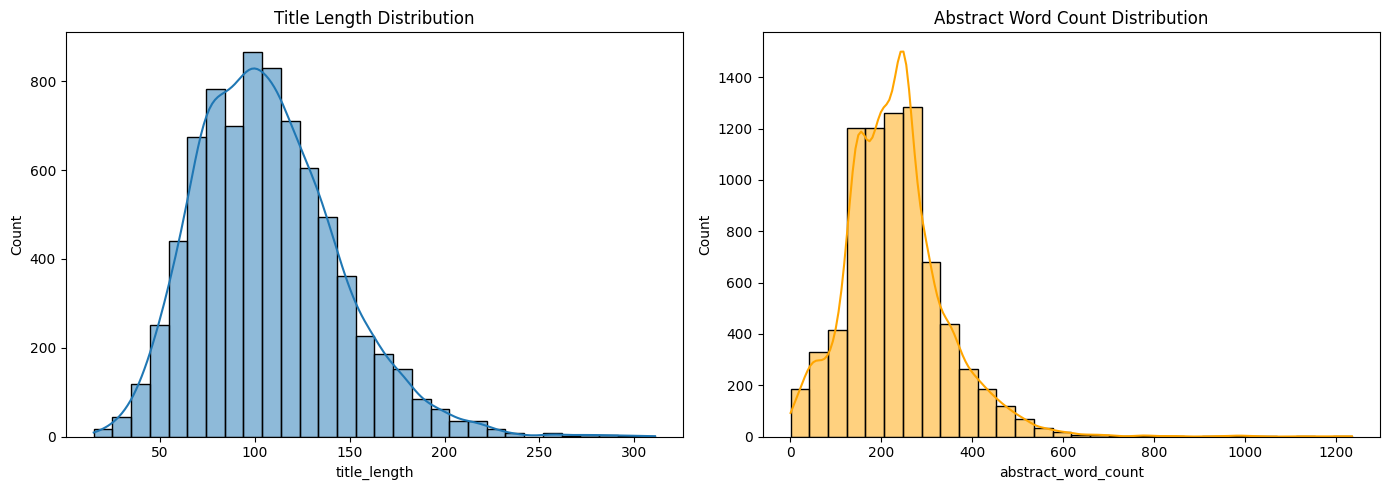

In [24]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_collection['title_length'], bins=30, kde=True)
plt.title("Title Length Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df_collection['abstract_word_count'], bins=30, kde=True, color='orange')
plt.title("Abstract Word Count Distribution")

plt.tight_layout()
plt.show()

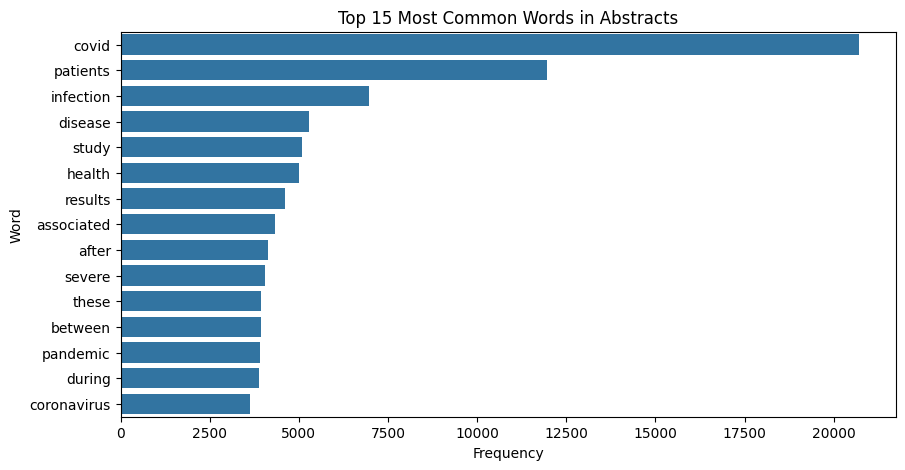

In [25]:
all_words = " ".join(df_collection['abstract'].dropna().tolist()).lower()
tokens = re.findall(r'\b\w{5,}\b', all_words)
top_words = Counter(tokens).most_common(15)

# Plot
words, freqs = zip(*top_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(freqs), y=list(words))
plt.title("Top 15 Most Common Words in Abstracts")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()